# Sales Data Analysis

### Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals.

### Content
- Order ID - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
- Product - The product that have been sold.
- Quantity Ordered - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
- Price Each - The price of each products.
- Order Date - This is the date the customer is requesting the order be shipped.
- Purchase Address - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

#### The main objective here is to extract key performance indicators (KPIs) that will enable you to make data-driven decisions and improve your company’s business. 

Below are questions I try to answer:
- What are the key demographics of the customers?
- Which market (city) generated the most sales on average?
- When were the best- and worst-selling periods?
- What time should we display adverstisement to maximize likelihood of customer's buying product?
- What products are most often sold together?
- Which products should the company order more or less of?
- What product sold the most? Why do you think it sold the most?

Below are some probability questions I aim to answer:
- How much probability for next people will ordered iPhone?
- How much probability for next people will ordered Google Phone?

## Acknowledgement 

### Link to the dataset: https://www.kaggle.com/datasets/knightbearr/sales-product-data

## Inspiration

### Link: https://www.dataquest.io/blog/10-great-portfolio-projects-for-business-analysis/

In [5]:
import pandas as pd
import os
from itertools import combinations
from collections import Counter
import numpy as np
from scipy import stats
import seaborn as sns

# Load all the datasets
files = ['C:/Users/PJ/Downloads/Sales_Product_Data/Sales_January_2019.csv', 'C:/Users/PJ/Downloads/Sales_Product_Data/Sales_February_2019.csv', 'C:/Users/PJ/Downloads/Sales_Product_Data/Sales_March_2019.csv', 'C:/Users/PJ/Downloads/Sales_Product_Data/Sales_April_2019.csv', 'C:/Users/PJ/Downloads/Sales_Product_Data/Sales_May_2019.csv', 'C:/Users/PJ/Downloads/Sales_Product_Data/Sales_June_2019.csv', 'C:/Users/PJ/Downloads/Sales_Product_Data/Sales_July_2019.csv', 'C:/Users/PJ/Downloads/Sales_Product_Data/Sales_August_2019.csv', 'C:/Users/PJ/Downloads/Sales_Product_Data/Sales_September_2019.csv', 'C:/Users/PJ/Downloads/Sales_Product_Data/Sales_October_2019.csv', 'C:/Users/PJ/Downloads/Sales_Product_Data/Sales_November_2019.csv', 'C:/Users/PJ/Downloads/Sales_Product_Data/Sales_December_2019.csv']
df = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

# Display the first few rows of the dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
# Check for missing values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### Since there are 545 missing values in each column. These missing values are needed to be handled before proceeding with the analysis.

In [7]:
# Remove missing values
df = df.dropna(how='any')

# Check again for missing values
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
# Check the data types of the columns to be sure
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### There are problems here. The 'Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', and 'Purchase Address' columns are all of the object data type. We need to convert 'Quantity Ordered' and 'Price Each' to numeric types and 'Order Date' to a datetime type so they are appropriate for the analysis

In [9]:
# Convert 'Quantity Ordered' and 'Price Each' to numeric types
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Convert 'Order Date' to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Check the data types of the columns again
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Now that the data is now ready to be analyzed, I will go answer each question respectively

#### (1) What are the key demographics of the customers?

Although the dataset does not contain age or gender information, we can extract the city and state from the 'Purchase Address' column to get an idea of the geographical distribution of customers.

In [10]:
# Extract city and state from 'Purchase Address' with check for unexpected address formats and return with 'None'
def extract_city(address):
    parts = address.split(',')
    if len(parts) >= 2:
        return parts[1].strip()
    else:
        return 'None'

def extract_state(address):
    parts = address.split(',')
    if len(parts) >= 3:
        return parts[2].split(' ')[1]
    else:
        return 'None'

df['City'] = df['Purchase Address'].apply(extract_city)
df['State'] = df['Purchase Address'].apply(extract_state)

# Display the first few rows of the dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,MA
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,OR
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,CA
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,TX


We can now the geographical distribution of customers. We can do this by

In [14]:
# Count the number of orders from each city
city_counts = df['City'].value_counts().reset_index().rename(columns={'index': 'City', 'City': 'Count'})

# Display the city counts
city_counts

,City,Count
0,San Francisco,44732
1,Los Angeles,29605
2,New York City,24876
3,Boston,19934
4,Atlanta,14881
5,Dallas,14820
6,Seattle,14732
7,Portland,12465
8,Austin,9905
9,None,355


#### As you can see, San Francisco has the highest number of orders, followed by Los Angeles and New York City. There are also some orders with an unknown city.

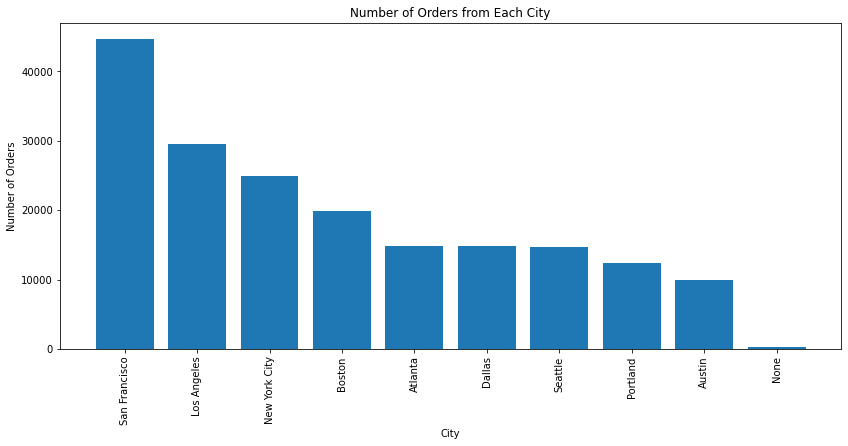

In [15]:
import matplotlib.pyplot as plt

# Plot the number of orders from each city
plt.figure(figsize=(14, 6))
plt.bar(city_counts['City'], city_counts['Count'])
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('Number of Orders from Each City')
plt.xticks(rotation='vertical')
plt.show()

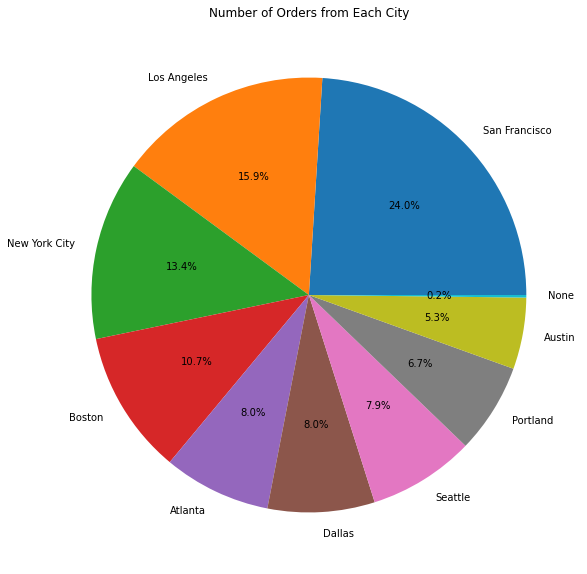

In [16]:
# Plot the number of orders from each city using a pie chart
plt.figure(figsize=(10, 10))
plt.pie(city_counts['Count'], labels=city_counts['City'], autopct='%1.1f%%')
plt.title('Number of Orders from Each City')
plt.show()

#### (2) Which market (city) generated the most sales on average?

This can be easily done by calculate the total sales for each city by multiplying the 'Quantity Ordered' by the 'Price Each' and then summing the result for each city

In [17]:
# Calculate total sales for each order
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Calculate total sales for each city
city_sales = df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Display the city sales
city_sales

,City,Sales
8,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
9,Seattle,2747755.48
7,Portland,2320490.61
1,Austin,1819581.75
6,None,0.00


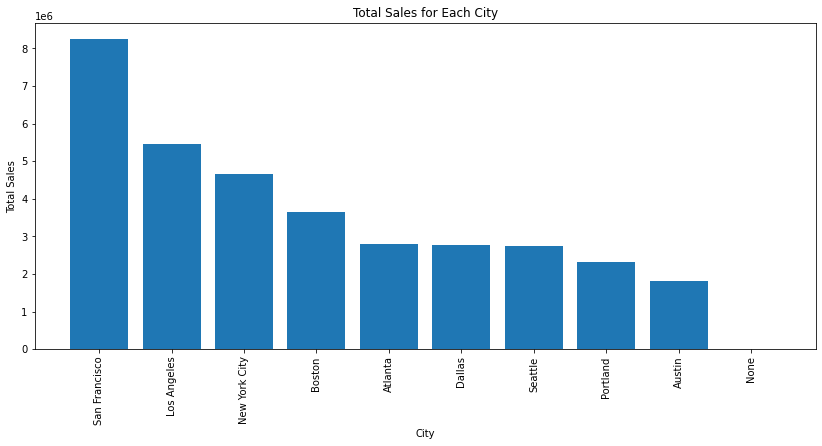

In [18]:
# Plot the total sales for each city
plt.figure(figsize=(14, 6))
plt.bar(city_sales['City'], city_sales['Sales'])
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each City')
plt.xticks(rotation='vertical')
plt.show()

#### (3) When were the best- and worst-selling periods?

We can answer this question by grouping the data by month and summing the 'Sales' for each month

In [20]:
# Extract month from 'Order Date'
df['Month'] = df['Order Date'].dt.month

# Calculate total sales for each month
month_sales = df.groupby('Month')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Display the month sales
month_sales

,Month,Sales
11,12.0,4613443.34
9,10.0,3736726.88
3,4.0,3390670.24
10,11.0,3199603.20
4,5.0,3152606.75
2,3.0,2807100.38
6,7.0,2647775.76
5,6.0,2577802.26
7,8.0,2244467.88
1,2.0,2202022.42


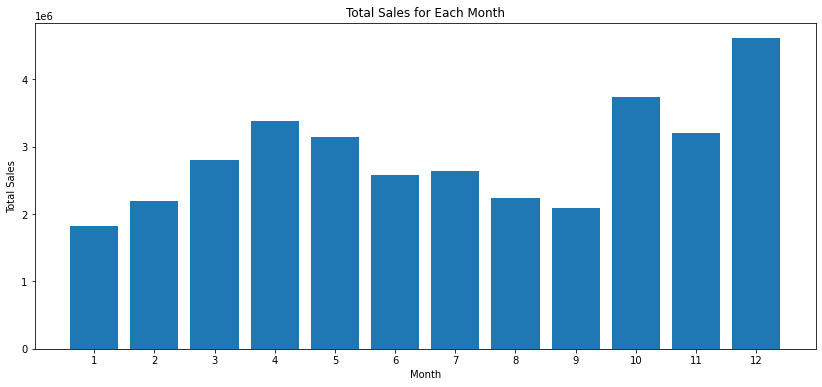

In [21]:
# Plot the total sales for each month
plt.figure(figsize=(14, 6))
plt.bar(month_sales['Month'], month_sales['Sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Month')
plt.xticks(range(1, 13))
plt.show()

December was the best-selling period, followed by October and April. February was the worst-selling period.

#### (4) What time should we display advertisements to maximize the likelihood of customers buying products?

We can answer this question by grouping the data by hour and counting the number of orders for each hour.

In [22]:
# Extract hour from 'Order Date'
df['Hour'] = df['Order Date'].dt.hour

# Count the number of orders for each hour
hour_orders = df['Hour'].value_counts().reset_index().rename(columns={'index': 'Hour', 'Hour': 'Count'}).sort_values(by='Hour')

# Display the hour orders
hour_orders

,Hour,Count
17,0.0,3910
19,1.0,2350
21,2.0,1243
23,3.0,831
22,4.0,854
20,5.0,1321
18,6.0,2482
16,7.0,4011
15,8.0,6256
13,9.0,8748


It seems that the number of orders peaks at around 7-9 AM. Therefore, this would be a good time to display advertisements to maximize the likelihood of customers buying products.

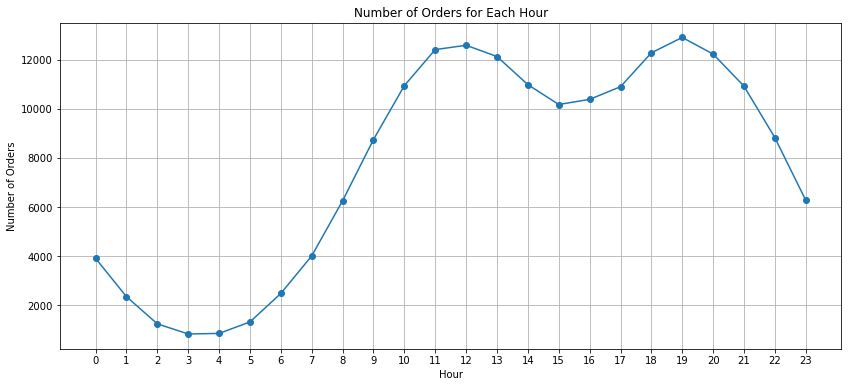

In [23]:
# Plot the number of orders for each hour using a line chart
plt.figure(figsize=(14, 6))
plt.plot(hour_orders['Hour'], hour_orders['Count'], marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Each Hour')
plt.xticks(range(24))
plt.grid(True)
plt.show()

#### (5) What products are most often sold together?

We can answer this question by finding the 'Order ID's that appear more than once, which indicates that multiple products were ordered together.

In [27]:
# Find 'Order ID's that appear more than once
df_dup = df[df['Order ID'].duplicated(keep=False)]

# Group products with the same 'Order ID' together
df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

# Drop duplicate 'Order ID's
df_dup = df_dup[['Order ID', 'Grouped']].drop_duplicates()

# Display the first few rows of the dataframe
df_dup.head()

C:\Users\PJ\AppData\Local\Temp/ipykernel_1800/3752884459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"


To find the most common combinations of products that were ordered together, We can count the number of times each combination appears in the 'Grouped' column

In [28]:
# Count the number of times each combination appears in the 'Grouped' column
count = Counter()

for row in df_dup['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

# Get the 10 most common combinations
for key, value in count.most_common(10):
    print(key, value)

('Product', 'Product') 62835
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143


#### (6) Which products should the company order more or less of?

We can answer this question by counting the number of orders for each product.

In [29]:
# Count the number of orders for each product
product_orders = df['Product'].value_counts().reset_index().rename(columns={'index': 'Product', 'Product': 'Count'})

# Display the product orders
product_orders

,Product,Count
0,USB-C Charging Cable,21903
1,Lightning Charging Cable,21658
2,AAA Batteries (4-pack),20641
3,AA Batteries (4-pack),20577
4,Wired Headphones,18882
5,Apple Airpods Headphones,15549
6,Bose SoundSport Headphones,13325
7,27in FHD Monitor,7507
8,iPhone,6842
9,27in 4K Gaming Monitor,6230


##### The'USB-C Charging Cable' and 'Lightning Charging Cable' are the most ordered products, so the company should order more of these. The '27in 4K Gaming Monitor' is the least ordered product, so the company should order less of this.

#### (7) What product sold the most? Why do you think it sold the most?

The 'USB-C Charging Cable' is the product that sold the most, with 21,903 orders.

As for why it sold the most, we can only speculate based on the information we are given. One reason could be that the 'USB-C Charging Cable' is a common accessory needed for many devices, including not only phones, tablets, and laptops but also most of the product listed require USB- C Charging Cable to rechrage such as 'Apple Airpods Headphones', 'Bose SoundSport Headphones', etc. It is also possible that it's priced more affordably compared to other items, leading to higher sales.

In [31]:
# Find the product with the highest count
most_sold_product = product_orders.iloc[0]

# Display the most sold product
most_sold_product

Product    USB-C Charging Cable
Count                     21903
Name: 0, dtype: object

### The probability questions:

#### - How much probability for the next person will order an iPhone?

#### - How much probability for the next person will order a Google Phone?

We can answer these questions by dividing the number of orders for each product by the total number of orders

In [32]:
# Calculate the total number of orders
total_orders = df['Order ID'].nunique()

# Calculate the number of orders for the iPhone and Google Phone
iphone_orders = df[df['Product'] == 'iPhone']['Order ID'].nunique()
google_phone_orders = df[df['Product'] == 'Google Phone']['Order ID'].nunique()

# Calculate the probability for the next person will order an iPhone or a Google Phone
iphone_probability = iphone_orders / total_orders
google_phone_probability = google_phone_orders / total_orders

# Display the probabilities
iphone_probability, google_phone_probability

(0.03833264215021464, 0.030946323092614803)